X
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
X norm
[[-1.5666989  -1.15669692 -0.92459328 -0.78691732]
 [-1.21854359 -1.06416117 -0.90312676 -0.78225604]
 [-0.87038828 -0.90993491 -0.84486052 -0.76205716]
 [-0.52223297 -0.69401815 -0.73139468 -0.70767556]
 [-0.17407766 -0.41641089 -0.54432937 -0.59300807]
 [ 0.17407766 -0.07711313 -0.26526474 -0.38449347]
 [ 0.52223297  0.32387514  0.1241991  -0.04111249]
 [ 0.87038828  0.78655391  0.64246199  0.48561217]
 [ 1.21854359  1.31092318  1.30792382  1.25161589]
 [ 1.5666989   1.89698295  2.13898444  2.32029206]]
theta
[  249500.          -606058.05451035  3072286.30474091 -5042412.77693987
  2864507.632478  ]
theta
[ 184166.66667007 -211002.33100447   94765.44289115  -15463.28671339
     890.15151516]


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9532\710185395.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = np.arange(min(X),max(X),0.1)


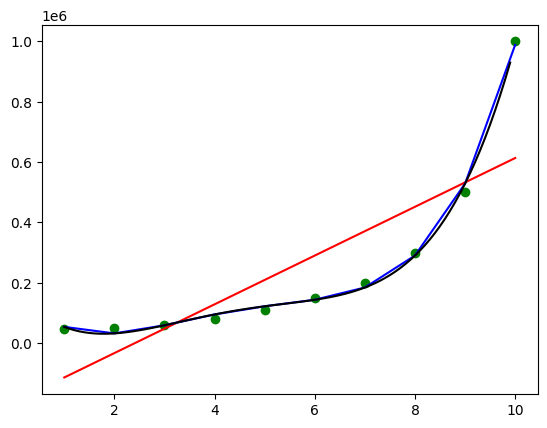

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def regresion_lineal(X,y):
    medias = X[:,0:].mean(axis=0)
    sigmas = X[:,0:].std(axis=0)
    Xe = (X[:,0:] - medias)/sigmas
    X1 = np.ones((X.shape[0],X.shape[1] + 1))
    X1[:,1:] = Xe
    theta = (np.linalg.inv(X1.T@X1))@(X1.T@y)
    theta[1:] = theta[1:]/sigmas
    theta[0] = theta[0] - np.sum(theta[1:]*medias) 
    X1[:,1:] = X
    return X1,theta
    
def regresion_polinomica(X,y,grado = 4):
    x = X[:,0]
    x2 = x**2
    x3 = x**3
    x4 = x**4
    X_p = np.zeros((X.shape[0],grado))
    X_p[:,0] = x ; X_p[:,1] = x2 ; X_p[:,2]=x3 ; X_p[:,3] =x4
    m , n  = X_p.shape
    medias = X_p[:,0:].mean(axis=0)
    sigmas = X_p[:,0:].std(axis=0)
    X_pf =X_p.copy()
    X_pf[:,0:] = (X_p[:,0:] - medias)/sigmas
    print(f"X norm\n{X_pf}")
    Xf = np.ones((m,n+1))
    Xf[:,1:] = X_pf
    theta = (np.linalg.inv(Xf.T@Xf))@(Xf.T@y)
    print(f"theta\n{theta}")
    theta[1:] = theta[1:]/sigmas
    theta[0] = theta[0] - np.sum(theta[1:]*medias)
    Xf[:,1:] = X_p
    return Xf,theta
# un detalle importante los X tienen m filas no importa cuantas tenga 
# estas se multiplican AVANZANDO en las columnas hasta (este caso ) 0,1,2,3,4   5 columnas en total
# y estas se multiplican por los 5 coefientes del vector columna THETA
# ya no importa la cantidad de filas que se tenga , la cantidad de columnas es la misma 5
# y theta 5 elementos y por lo que lo que varia es el y_pred final de m filas y 1 columna
def predecir_polinomica(X,theta,grado=4):
    x = X[:,0]
    x2 = x**2
    x3 = x**3
    x4 = x**4
    X_p = np.zeros((X.shape[0],grado))
    X_p[:,0] = x ; X_p[:,1] = x2 ; X_p[:,2]=x3 ; X_p[:,3] =x4
    m ,n = X_p.shape
    X1 = np.ones((m,n+1))
    X1[:,1:] = X_p
    return X1@theta

datos = pd.read_csv('Position_Salaries.csv')
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values
print(f"X\n{X}")
# poly_reg = PolynomialFeatures(degrees=4) de x → x, x^2 x^3 x^4
X1,theta_lineal = regresion_lineal(X,y)
plt.plot(X,X1@theta_lineal,color='red')
Xf,theta = regresion_polinomica(X,y)
print(f"theta\n{theta}")
plt.scatter(X,y,color='green') 
plt.plot(X,Xf@theta,color='blue') 
x = np.arange(min(X),max(X),0.1)
x = x.reshape((len(x),1)) 
plt.plot(x,predecir_polinomica(x,theta),color="black")
#plt.show()